In [2]:
%matplotlib inline
import numpy as np
np.random.seed(0)
import pandas as pd
import math

# sizes
plot_size = (18, 12)
half_plot_size = (18, 6)


import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
# Change style according to FH
import matplotlib.pyplot as plt
plt.style.use('img/fh_kiel.mplstyle')
plot_size = (18, 12)

blue = '#00305D'
green = '#006A4D'
orange = '#F49E00'
dark_red = '#B5123E'
alarm_red = '#E20020'
light_green = '#7AB51D'

# Grundlagen Maschinelles Lernen

## Fundamentals of Machine Learning


Prof. Dr.-Ing. Daniel Böhnke


# Bayes Rule

$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$
$$P(B|A) = \frac{P(B\cap A)}{P(A)}$$
* Zwei bedingte Wahrscheinlichkeiten für $P(A|B)$ und $P(B|A)$
$$P(A\cap B) = P(B\cap A)$$
* Den Durchschnitt können wir in jedwede Richtung notieren
$$P(A|B) = \frac{P(A\cap B)}{P(B)} \frac{P(A)}{P(A)} = \frac{P(A)}{P(B)}P(B|A)$$
* Somit erhalten wir die Formel von Bayes, die eine Zusammenhang zwischen $P(A|B)$ und $P(B|A)$ herstellt.

# Zentraler Grenzwertsatz

<img style="float: right;" src="img/galton.gif" width=30% class="stretch">

- **Zentraler Grenzwertsatz (ZGW)**: Eines der mächtigsten Konzepte in der Statistik.

- **Beschreibung**: Die Summe einer großen Anzahl unabhängiger, identisch verteilter Zufallsvariablen nähert sich einer Normalverteilung an, unabhängig von der Form der ursprünglichen Verteilung.

- **Bedeutung**: Ermöglicht die Verwendung der Normalverteilung für viele praktische Anwendungen, selbst wenn die zugrundeliegende Verteilung unbekannt ist.

- **Voraussetzungen**: Große Stichprobengröße (Faustregel: n > 30) und Unabhängigkeit der Beobachtungen.

*https://evamaerey.github.io/*

# Beschreibung einer Messgröße (daten-basiert)

* Arithmetisches Mittel (oft einfach der Mittelwert)

$$\bar{x} = \frac{1}{n} \sum_{i=1}^n{x_i}$$

* (Stichproben) Standardabweichung

$$s_n = \sqrt{\frac{1}{n-1} \sum_{i=1}^n \left(x_i - \bar{x}\right)^2}$$


# Standardnormalverteilung


<center><img src="img/Standard_deviation.png" width=40% class="stretch"></center>

$$f(x ) =  \frac{1}{\sqrt{2\pi}}e^{\frac{-(x)^2}{2}}$$

* Wenn $\mu = 0$ und $\sigma = 1 $ sind, dann vereinfacht sich unsere Formel enorm.
* Wie Zufallsvariablen in dieser Hinsicht manipuliert werden, lernen Sie noch:

    * $50\%$ aller Messwerte haben eine Abweichung von höchstens 0,675 $\sigma$ 
    * $90\%$ aller Messwerte haben eine Abweichung von höchstens 1,645 $\sigma$
    * $95\%$ aller Messwerte haben eine Abweichung von höchstens 1,960 $\sigma$
    * $99\%$ aller Messwerte haben eine Abweichung von höchstens 2,576 $\sigma$



# Heute

* In der vergangenen Woche wurden noch einige Grundlagen gelegt. 
* Heute soll ein erstes Modell trainiert werden, wir beginnen mit der Linearen Regression. 
* Die Lineare Regression ist ein einfaches und daher oft auch sinnvolles Werkzeug, um Daten zu betrachten. Die Eigenschaften des Modells sind überschaubar und daher ist eine Interpretation in der Regel einfach. 
* Des Weiteren werden wir versuchen Schwächen des Modells zu beleuchten und ggfs. Umwege aufzeigen. 

# Lernlandkarte 
<center><img src="img/lernlandkarte.png" width=80% class="stretch"></center>

# Grundformel des Maschinellen Lernens

$$Y = f(X) + \epsilon$$

* $X$ entspricht den Prediktoren (Unabhängigen Variablen, Features, Input).
* $Y$ entspricht der Antwort (Abhängige Variable, Output).
* $\epsilon$ entspricht dem zufälligen Fehlerterm mit Mittelwert $\mu = 0$.
* $f()$ ist die "unbekannte" Funktion zwischen Prediktor und Antwort.
* Später werden wir versuchen ein $\hat{f}()$ zu bestimmen, welches $f()$ so gut wie möglich approximiert. 


# Lineare Regression

$$
\begin{align}
y &= f(x) + \epsilon \tag{Realer Prozess} \\
y &= \hat{f}(x)  \tag{Modellierungsansatz} \\
\hat{f}(X) &= \beta_0 + \beta_1 X \tag{Ansatz Lineare Regression}\\
\end{align}$$


* Es wird versucht einen Zusammenhang zwischen (einem in der Regel kontinuierlichen) $y$ und (mehreren)  unabhängigen Größen $x$ zu finden.
* Regressionsanalysen können beliebig komplex werden und sind z.B. bei Symbolischer Regression Bestandteil aktiver Forschung. 
* Ob die Regression als Vorhersage einsetzbar ist, ist je nach Datenlage zu begründen. 

# Anwendungsbeispiel Surrogat Modellierung

* Simulationen sind ein Beispiel für ein HEB Problem: 
    * **H**igh-dimensional
    * **E**xpensive (computationally) 
    * **B**lackbox  
    
* In der Regel ist es wichtig die Simulation an vielen "Positionen" auszuwerten: 
    * Exploration: Es wird versucht mehr Verständnis über ein Problem zu erlangen.
    * Optimierung: Ein System soll hin zu einem bestimmten "besten" Punkt getrieben werden. 
    
* Ein möglicher Ansatz diese Ziele bei verringerten Kosten zu erreichen ist der Einsatz von Surrogat Modellen.

# Surrogate von CFD Modellen

<img style="float: right;" src="img/drugila.png" width=15% class="stretch">

* Aufgabe: Berechne mit Hilfe von RANS Simulationen den Interferenz Widerstand eines abgestrebten Flügels. 
* Zunächst wird ein sinnvolle Parametrisierung des Problems gewählt, d.h. die größten Einflußgrößen werden identifiziert. 
* Anschließend wird eine Vielzahl von Simulationen ausgeführt.
* Auf den gewonnen Daten wird eine Regression durchgeführt: 

$$-0.05-0.18 \sin{\phi}+ 1.54 \frac{t}{c} + 0.11 \sin{\phi}^2+ 27.46\frac{t}{c}^2-0.42 \frac{t}{c}\sin{\phi}$$

*Drugila et al., Analysis of Interference Drag for Strut-Strut Interaction in
Transonic Flow, 2011*

# Beispiel: Mathematisches Pendel

$$T_0 = 2\pi\sqrt{\frac{l}{g}}$$ 

* Wir nehmen absichtlich ein solch einfaches Beispiel.
* Die Daten wurden nach dieser Gleichung mit zusätzlichem Rauschen generiert. 
    * D.h. wir können gegen eine analytische Lösung prüfen.
    * Spannend wird es, wenn wir versuchen das Rauschen rauszurechnen.

# Beispiel: Mathematisches Pendel

* Vermessen wurden diverse mathematische Pendel mit unterschiedlichen Längen! 
* Die Daten sind mit einem Rauschen überlagert. 
* Der Einfachheit halber beschränkt sich das Beispiel auf 100 Messwerte.

In [4]:
g = 9.81
# Initialisiere Zufallswerte / Linspaces
df = pd.DataFrame({'Periode': np.random.normal(1,.5, size=100), 'Länge': np.linspace(0.5,3.,num=100)})
# Berechne verrauschte Periode
df['Periode'] = 2*math.pi*np.sqrt(df['Länge']/g)+df['Periode']
df.head()

,Periode,Länge
0,3.300530,0.500000
1,2.653962,0.525253
2,2.977791,0.550505
3,3.642624,0.575758
4,3.488979,0.601010


# Versuchsdaten Mathematisches Pendel

In [4]:
df['Länge'].mean(), df['Länge'].std()

(1.7500000000000002, 0.7326134337343942)

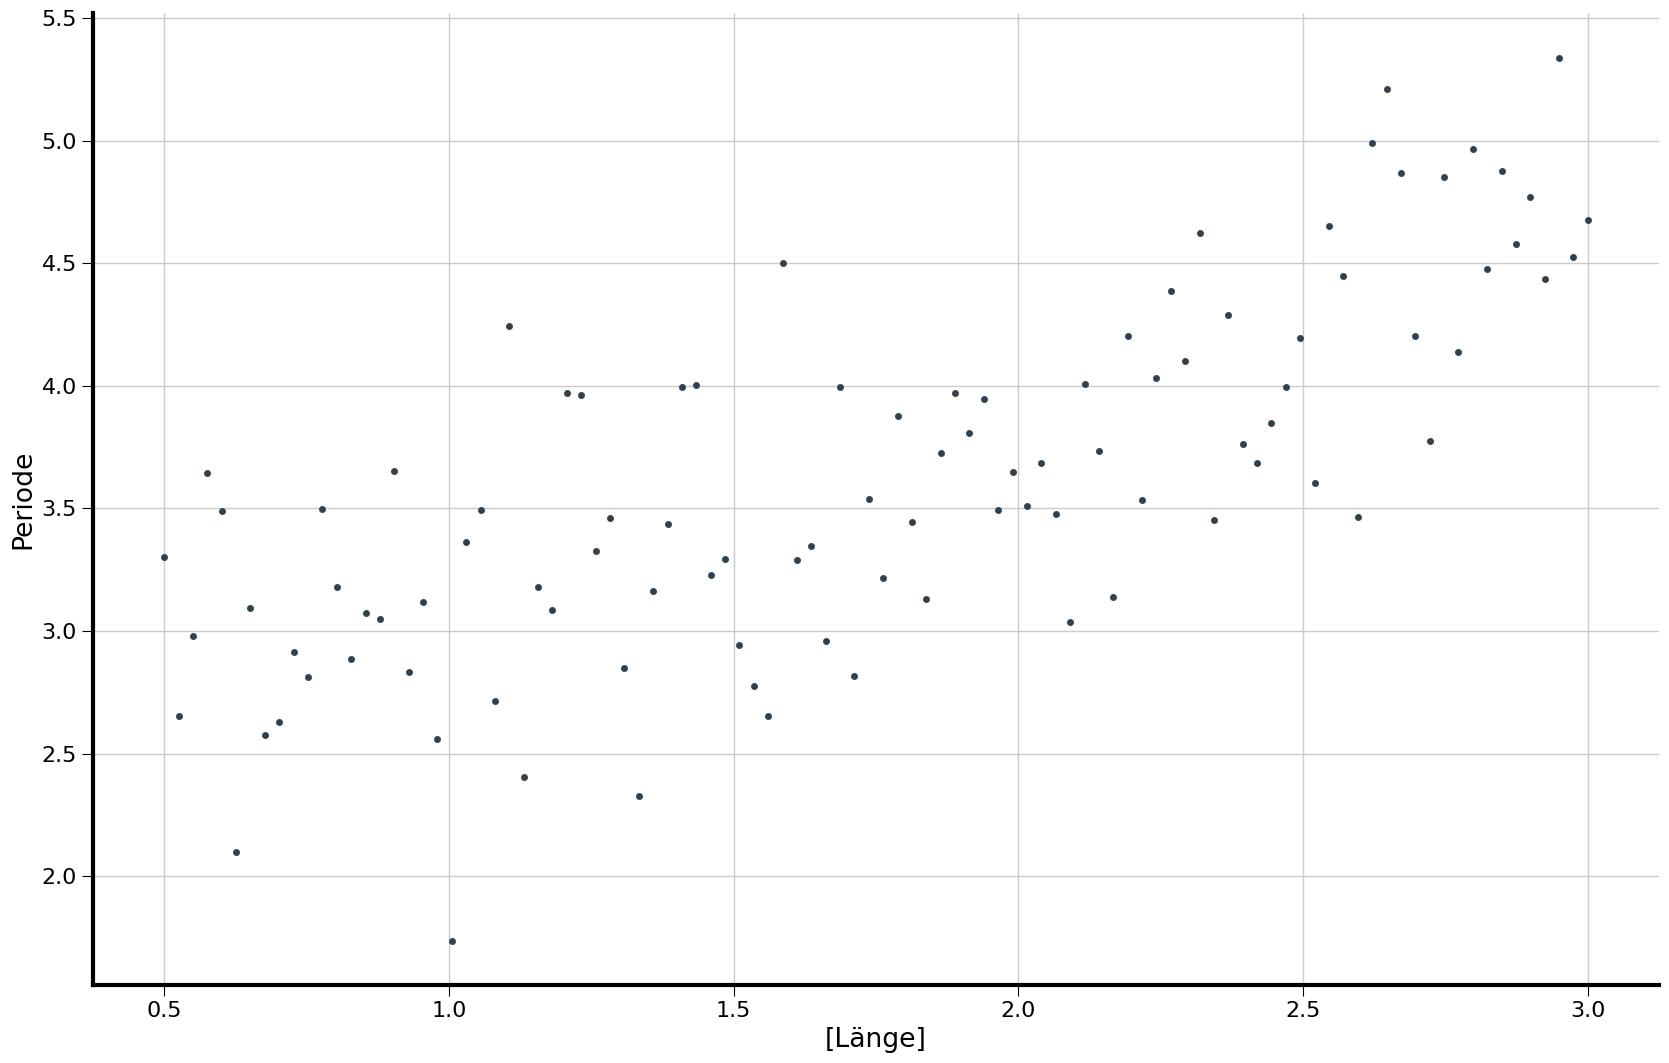

In [5]:
predictors = [ 'Länge']
fig, ax = plt.subplots(1, len(predictors), figsize=plot_size)
df.plot(y = 'Periode', x = predictors, kind="scatter", ax=ax);

# Lineare Regression

$$\hat{f}(X) = \beta_0 + \beta_1 X$$

* Einfaches, gut zu interpretierendes Modell
* Insbesondere in der Statistik häufig verwendet
* Annahme des linearen Zusammenhangs


* Wie lautet $\hat{f}$ für unser Problem?

# Lineare Regression für das Pendel

$$y_{periode} = \beta_0+\beta_1 x_{länge}$$

* Wir müssen nun $\beta_0$ und $\beta_1$ bestimmen!
* Dazu verwendet man die Methode der kleinsten Quadrate: 

$$min(\sum^n_{i=1} (y_i-\beta x_i)^2)$$
* bzw. 
$$min(\sum^n_{i=1} (y_{periode, i} - (\beta_0+\beta_1 x_{länge, i})^2)$$
* d.h. wir versuchen alle $\beta$ so zu wählen, dass das Residuum $(y-\beta x)^2$ minimal wird  

# Normalengleichung der Linearen Regression

* Wir können unsere Problemstellung in Matrix-Schreibweise ausdrücken!
* Die Residuuen können über die zweite Euklidsche Norm beschrieben werden und wir suchen den $\beta$ Vektor, der diese minimiert:
$$||X\beta−Y||^2_2= min_{\beta∈R^n}$$

* Ohne Herleitung können wir in die Normalengleichung überführen:
$$X^TX\beta=X^TY$$

* Und nach $\beta$ lösen:

$$\beta= (X^TX)^{−1}X^TY$$





In [5]:
y = df['Periode'].to_numpy()
X = df[['Länge']].to_numpy()
bias = np.ones((100,1))
X = np.hstack((bias, X))
y, X

(array([3.30052953, 2.65396154, 2.97779078, 3.64262374, 3.488979  ,
        2.09889717, 3.09427079, 2.57463002, 2.62920656, 2.91607866,
        2.81224879, 3.49632127, 3.1781945 , 2.8865597 , 3.07527598,
        3.04739803, 3.65442859, 2.83126595, 3.11647789, 2.55865212,
        1.73463122, 3.36304409, 3.49325569, 2.71446293, 4.24464592,
        2.40653397, 3.18027845, 3.08723248, 3.97039027, 3.96161511,
        3.3271107 , 3.4611927 , 2.85047288, 2.32600804, 3.16428298,
        3.43804433, 3.9964495 , 4.00373719, 3.22994076, 3.29332832,
        2.94090197, 2.77569589, 2.65292805, 4.50164507, 3.29146536,
        3.34713197, 2.95949632, 3.99421473, 2.8179502 , 3.5378158 ,
        3.2155998 , 3.8757948 , 3.44581766, 3.12964982, 3.72449217,
        3.97124087, 3.80870201, 3.94492703, 3.49465931, 3.6484629 ,
        3.51150244, 3.68574347, 3.47662456, 3.03762633, 4.00694484,
        3.73470155, 3.13775103, 4.20139923, 3.53341827, 4.03000262,
        4.38544244, 4.10216218, 4.62405253, 3.45

In [6]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([2.33308201, 0.73481035])

# Bias Term

```python
X = df[['Länge']].to_numpy()
bias = np.ones((100,1))
X = np.hstack((bias, X))
```

* Der Bias Term ist ggfs. etwas unintuitiv. Warum wird ein Einser-Vektor benötigt?
* Nach Abgleich mit der Formulierung des Modells sollte der Eintrag klarer werden: 
    
$$y_{periode} = \beta_0+\beta_1 x_{länge}$$

* Ohne Bias Eintrag existiert kein $\beta_0$  und somit auch kein *Achsenabschnitt*.


# Trainiere Lineare Regression auf Pendeldaten

* Auf der vorherigen Folie wurde das gesamte Problem mit Hilfe der Normalengleichung gelöst. 
* Aus Demonstrationszwecken werden in der Folge zunächst zwei separate Modelle betrachtet. 
* Diese können auch mit "professionellen" Werkzeugen in Python bestimmt werden. 

In [8]:
from sklearn.linear_model import LinearRegression
model_l = LinearRegression().fit(df[['Länge']].values, df['Periode'].values)

print("Lineare Regression Länge: Achsenabschnitt: %.2f, Steigung: %.2f" %(model_l.intercept_, model_l.coef_[0]))

Lineare Regression Länge: Achsenabschnitt: 2.33, Steigung: 0.73


# Fit Lineare Regression

* Grün beschreibt das jeweilige Modell
* Auf der linken Seite (Länge) scheint die Steigung größer zu sein. 
* Mit bloßem Auge scheint das Modell die Daten besser zu beschreiben. 
* In der Folge wird versucht die Güte der Modelle zu quantifizieren. 

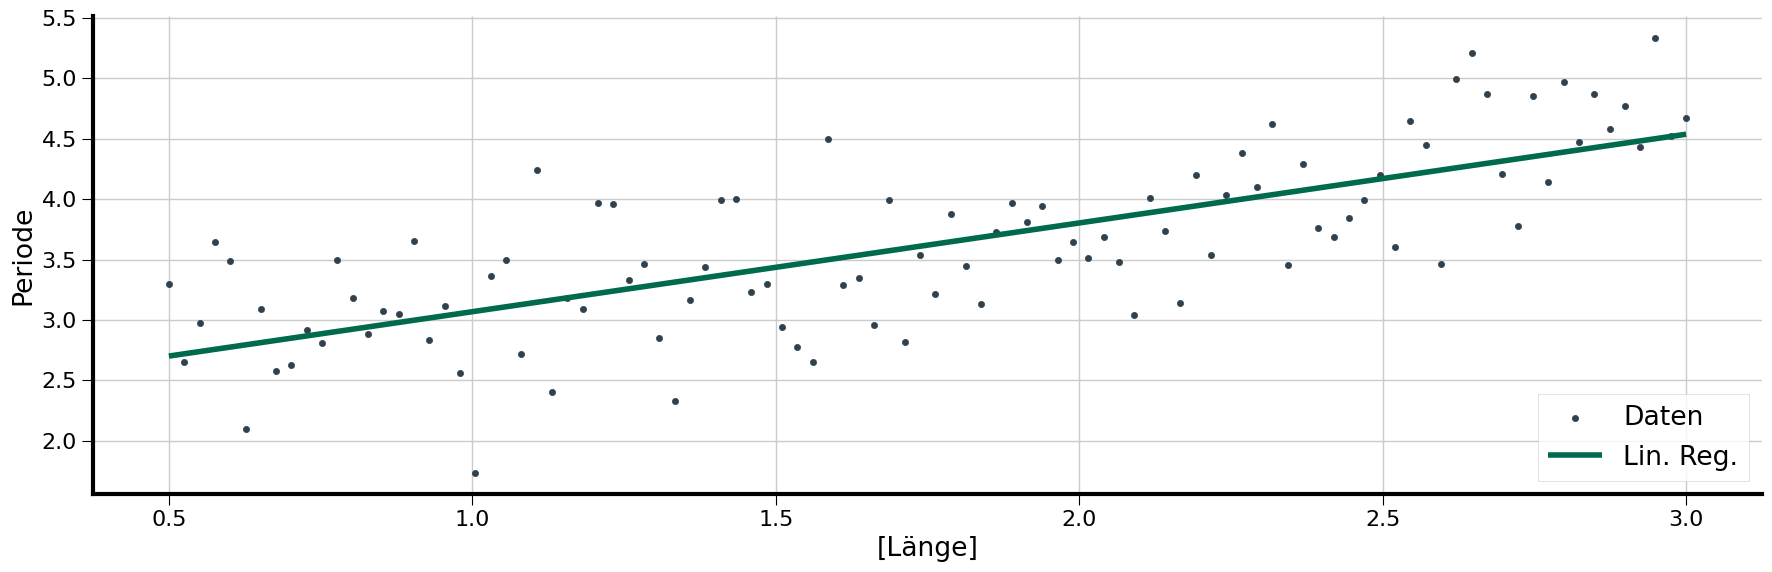

In [9]:
# Plotte Lineare Regression für Pendel
n = 100
predictor = [ 'Länge']
models = model_l

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)
#for i, predictor in enumerate(predictors):
df.plot(y = 'Periode', x = predictor, kind="scatter", ax=ax, label='Daten')
x = np.linspace(df[predictor].min(), df[predictor].max(), n).reshape(-1, 1)
ax.plot(x, models.predict(df[predictor]), c=green, label='Lin. Reg.')
ax.legend(loc=4)
plt.tight_layout()

# Fehler der Linearen Regression

* Offensichtlich kann nicht jeder Punkt auf der Linie liegen (zufälliges Rauschen).
* Hier wird der Fehler in $y$ dargestellt.


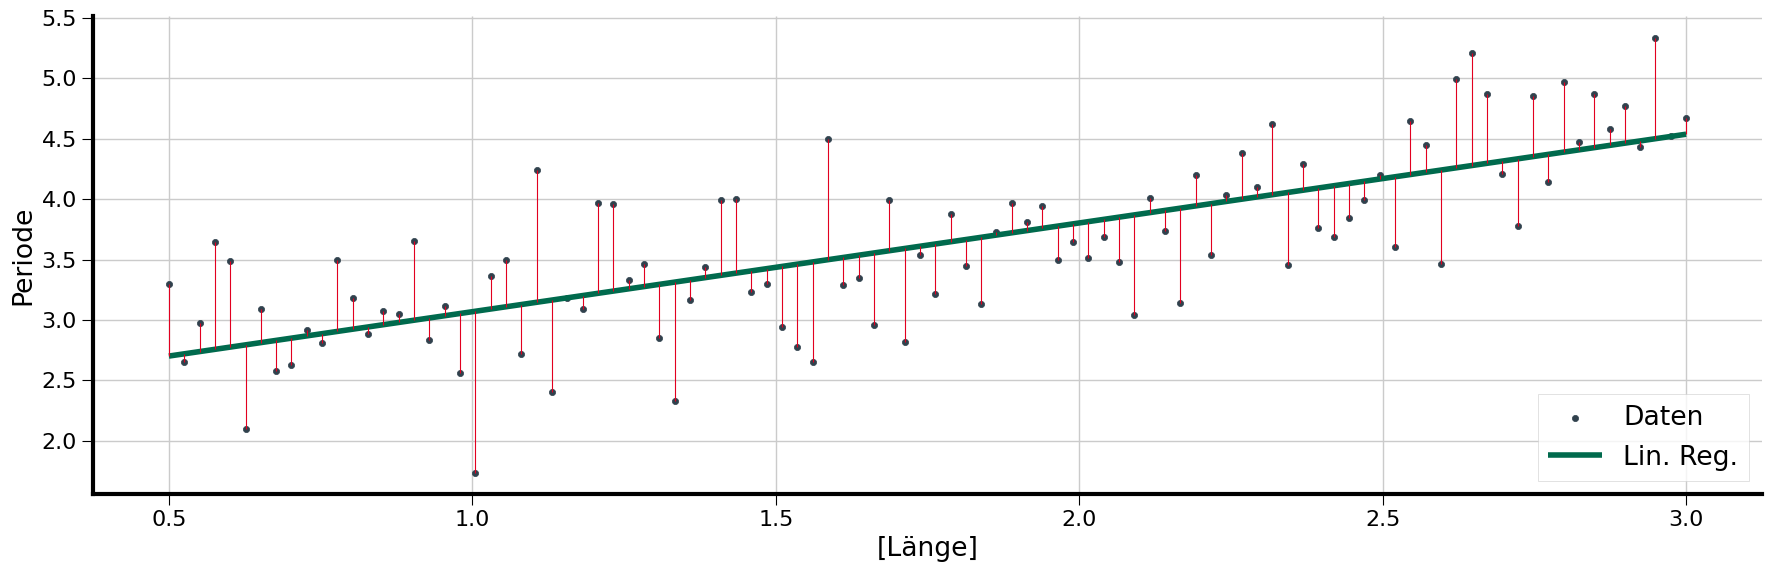

In [10]:
# Plotte Lineare Regression für Pendel mit Fehlerbalken
n = 100
predictor = [ 'Länge']
models = model_l

df['Vorhersage_'+predictor[0]] = models.predict(df[predictor].values.reshape(-1, 1))

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

df.plot(y = 'Periode', x = predictor, kind="scatter", ax=ax, label='Daten')
x = np.linspace(df[predictor].min(), df[predictor].max(), n).reshape(-1, 1)
ax.plot(x, models.predict(x), c=green, label='Lin. Reg.')
for j, r in df.iterrows():
    ax.plot([r[predictor], r[predictor]], [r['Periode'], r['Vorhersage_'+predictor[0]]], c = alarm_red, linewidth=0.8)

ax.legend(loc=4)

plt.tight_layout()

# Güte des Modells: 

<img style="float: right;" src="img/reg_fehler.png" width=30% class="stretch">
$$y_{periode} = \beta_0+\beta_1 x_{länge}$$

* Ein Modell wurde trainiert. 
* Fehler wurden visualisiert.




* Ist das Modell *gut*?
* Wie quantifizieren Sie die Qualität des Modells?

# Absoluter Modellfehler 

$$r_{max} = \max(|y_i-\hat{f}(x_i)|)$$ 

* Bestimmt die individuellen Residuuen ...
* ... und findet deren absolut größten Wert.


In [11]:
max_l = (abs(df['Periode']-df['Vorhersage_Länge'])).max()

print('Maximaler Fehler Länge: %.2f' %max_l)

Maximaler Fehler Länge: 1.34


# Gemittelter Modellfehler MSE

* Definiert wird der `Mean Squared Error (MSE)`:

 $$MSE = \frac{1}{n}\sum_{i=1}^n (y_i-\hat{f}(x_i))^2$$ 

* Einfache Fehlerbetrachtung für Regressionprobleme
* Bestraft durch den quadratischen Term große Abweichung.
* Analog zur Optimierung via Methode der kleinsten Quadrate.

In [12]:
df['Vorhersage_Länge'] = model_l.predict(df[['Länge']])

In [13]:
mse_l = ((df['Periode']-df['Vorhersage_Länge'])**2).mean()

print('Mean Squared Error für Länge: %.2f' %mse_l)

Mean Squared Error für Länge: 0.23


### Anwendungsfall

* Können Sie Anwendungsfälle vorschlagen in denen jeweils einer der beiden Fehlertypen relevant ist?
    * Absoluter Fehler
    * Gemittelter Fehler

# Neuer Wertebereich

In [14]:
g = 9.81
df = pd.DataFrame({'Periode': np.random.normal(1,.5, size=100), 'Länge': np.linspace(1.,100.,num=100)})
df['Periode'] = 2*math.pi*np.sqrt(df['Länge']/g)+df['Periode']

df.head() 

,Periode,Länge
0,3.947642,1.0
1,3.163127,2.0
2,3.839367,3.0
3,5.496832,4.0
4,4.899140,5.0


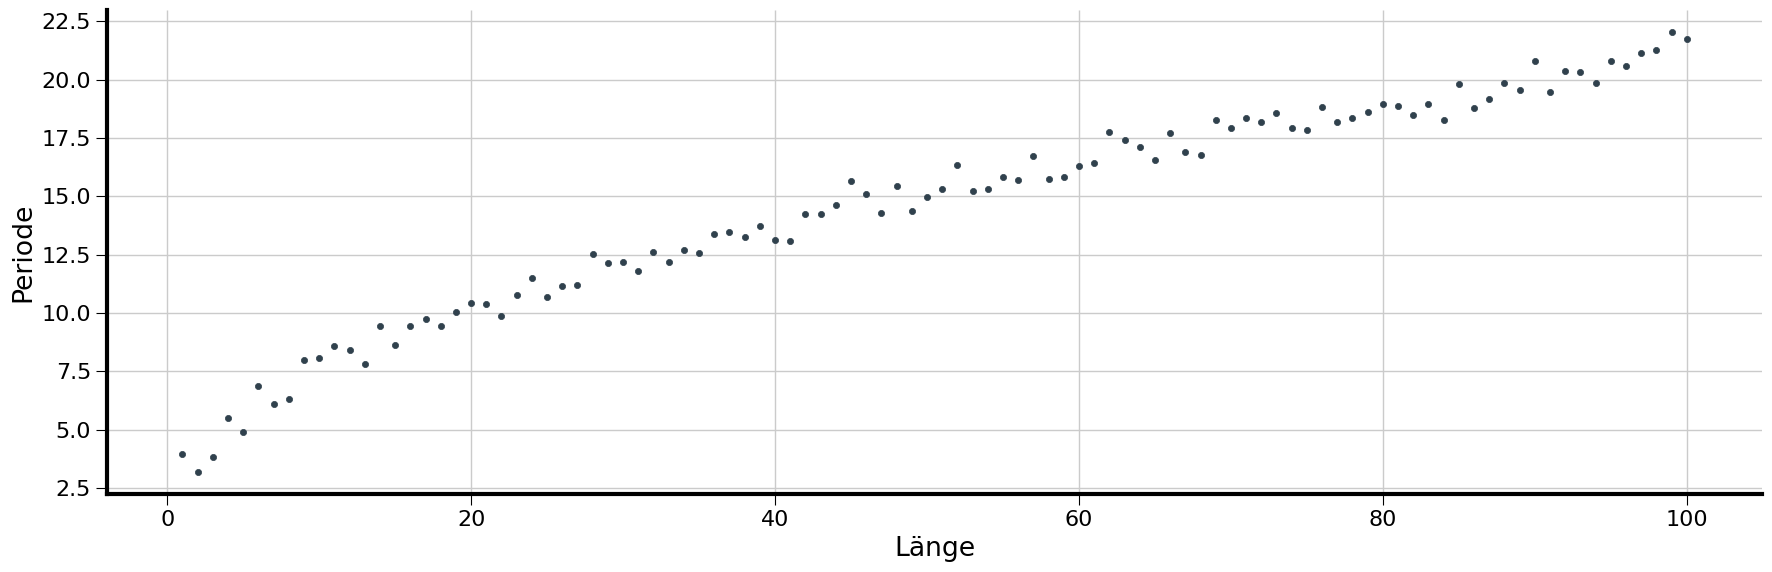

In [15]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)
df.plot(y = 'Periode', x = 'Länge', kind="scatter", ax=ax)

plt.tight_layout()
plt.show()

# Neuer Fit im neuen Wertebereich

In [16]:
old_model_l = model_l

In [17]:
from sklearn.linear_model import LinearRegression
model_l = LinearRegression().fit(df[['Länge']], df['Periode'])

print("Lineare Regression Länge: Achsenabschnitt: %.2f, Steigung: %.2f" %(model_l.intercept_, model_l.coef_[0]))

Lineare Regression Länge: Achsenabschnitt: 6.64, Steigung: 0.16


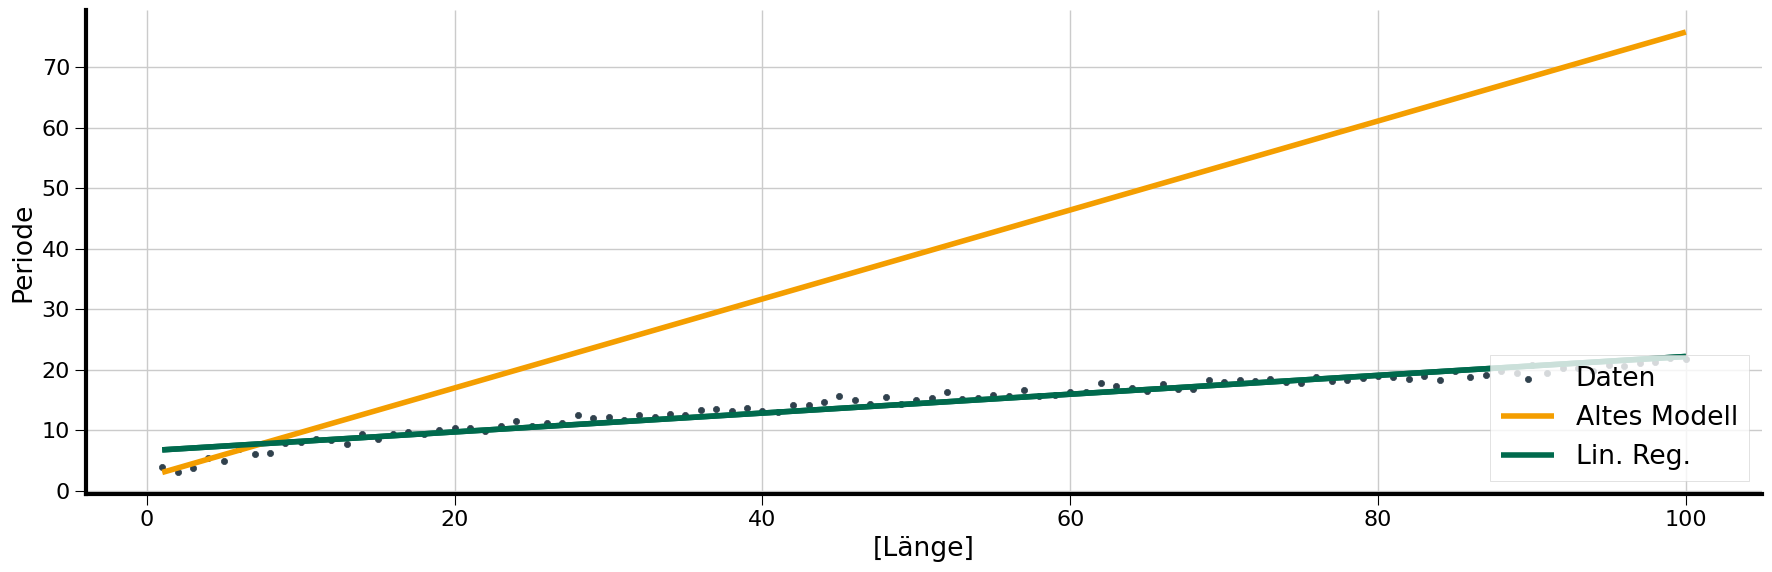

In [18]:
n = 100
predictor = [ 'Länge']
models = [model_l]
old_models = [old_model_l]

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)
df.plot(y = 'Periode', x = predictor, kind="scatter", ax=ax, label='Daten')
x = np.linspace(df[predictor].min(), df[predictor].max(), n).reshape(-1, 1)
ax.plot(x, models[0].predict(x), c=green)
ax.plot(x, old_models[0].predict(x), c=orange, label='Altes Modell' )

ax.plot(x, models[0].predict(x), c=green, label='Lin. Reg.')
ax.legend(loc=4)

plt.tight_layout()

# Fehler im neuen Wertebereich

* Die Wahl der Daten beeinflußt die Güte des Modells
    * Interpolation: Wir benutzen die Daten um **innerhalb** des Definitionsbereichs Werte zu bestimmen.
    * Extrapolation: Wir benutzen die Daten um **außerhalb** des Definitionsbereichs Werte zu bestimmen.

* Beim Fehler ist inzwischen eine klare Tendenz erkennbar. 
* Die lineare Abhängigkeit wird später weiter untersucht werden. 

In [19]:
df['Vorhersage_Länge'] = model_l.predict(df[['Länge']])
mse_l = ((df['Periode']-df['Vorhersage_Länge'])**2).mean()

print('Mean Squared Error für Länge: %.2f' %mse_l)

Mean Squared Error für Länge: 1.01


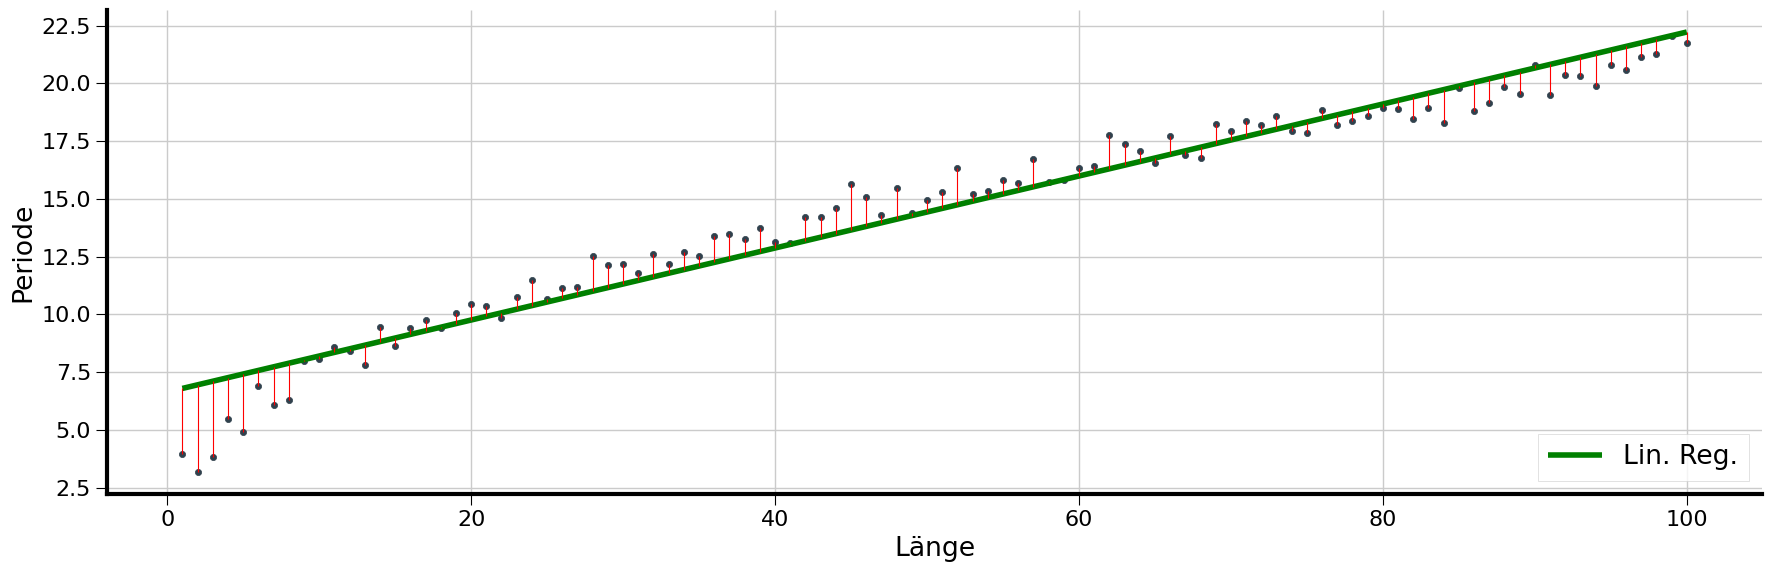

In [20]:
n = 100
predictor = 'Länge'
model = model_l  # Angenommen, model_l ist das Modell für die Länge

# Erstellen der Vorhersage für Länge
df['Vorhersage_' + predictor] = model.predict(df[[predictor]])

# Erstellen des Plots
fig, ax = plt.subplots(figsize=half_plot_size)  # Wir benötigen nur eine Achse
df.plot(y='Periode', x=predictor, kind="scatter", ax=ax)
x = np.linspace(df[predictor].min(), df[predictor].max(), n).reshape(-1, 1)
ax.plot(x, model.predict(df[[predictor]]), color='green', label='Lin. Reg.')
for j, r in df.iterrows():
    ax.plot([r[predictor], r[predictor]], [r['Periode'], r['Vorhersage_' + predictor]], color='red', linewidth=0.8)

ax.legend(loc=4)
plt.tight_layout()


# $R^2$

* Bisher haben wir $MSE$ als Qualitätskriterium für ein Modell kennengelernt.
* $MSE$ wird in der gleichen Einheit wie $y$ ausgedrückt.
* Ein Gütekriterium um den Bereich von $0, \ldots,1$ ist in manchen Fällen einfacher zu interpretieren.
* $R^2$ gibt an wieviel Varianz in den Daten durch das Modell erklärt wird.

# $R^2$

* $TSS$ ist Varianz aller bekannten Daten. Die Summe der Differenz von Messwert zu MIttelwert

$$ TSS = \sum_{i=1}^n (y_i-\bar{y})^2$$ 

* $RSS$ ist bereits bekannt:

$$RSS = \sum_{i=1}^n (y_i-\hat{y}_i)^2$$ 

* Und $R^2$ wird berechnet aus 

$$R^2 = 1 - \frac{RSS}{TSS}$$ 


# Nichtlinearität

* Lineare Regression stellt die Annahme, dass der tatsächliche Zusammenhang auch linear ist
* Nichtlinearität wird am besten mittels eines Residuenplots überprüft
    * Größe des Fehlers (des Residuums) über $x$

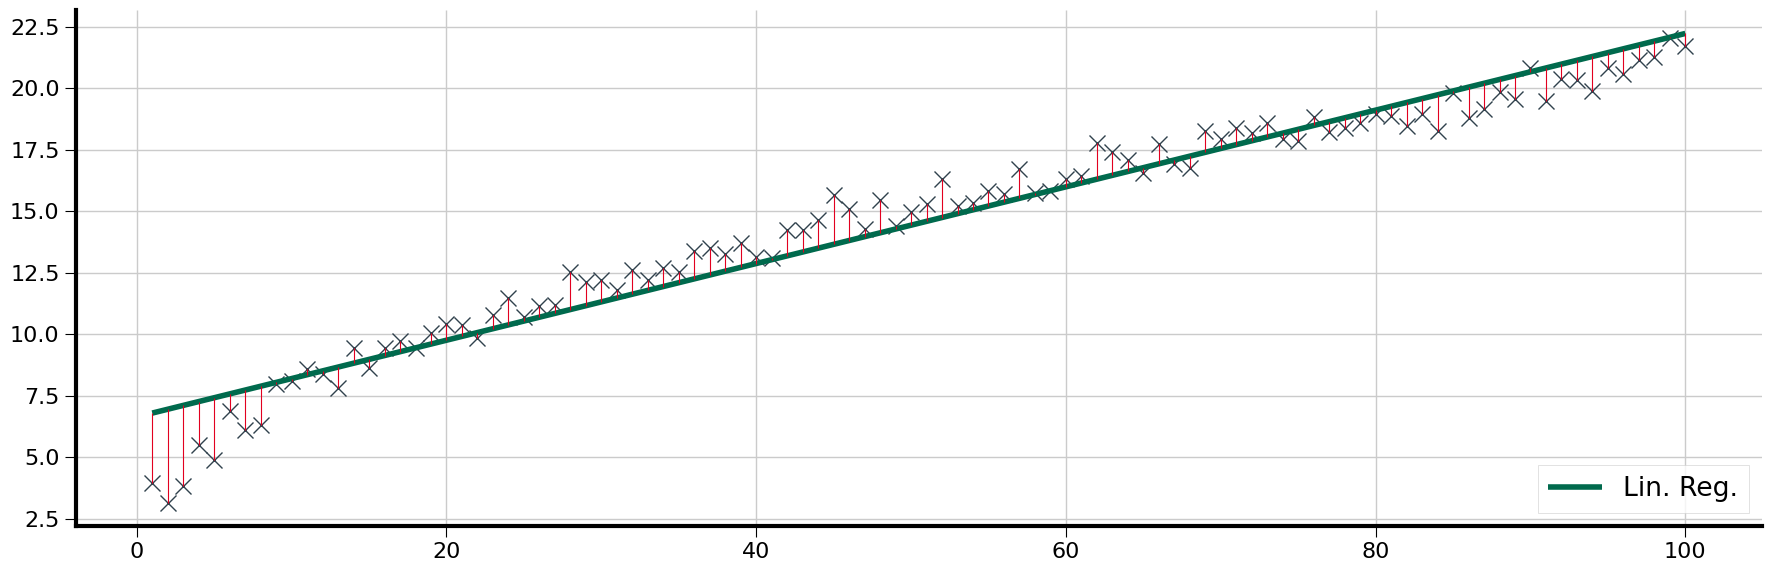

In [21]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size) 
ax.plot(df['Länge'],df['Periode'], 'x')
ax.plot(df['Länge'],df['Vorhersage_Länge'], c=green, label='Lin. Reg.')
for j, r in df.iterrows():
    ax.plot([r['Länge'], r['Länge']], [r['Periode'], r['Vorhersage_'+'Länge']], c = alarm_red, linewidth=0.8)

ax.legend(loc=4)
plt.tight_layout()

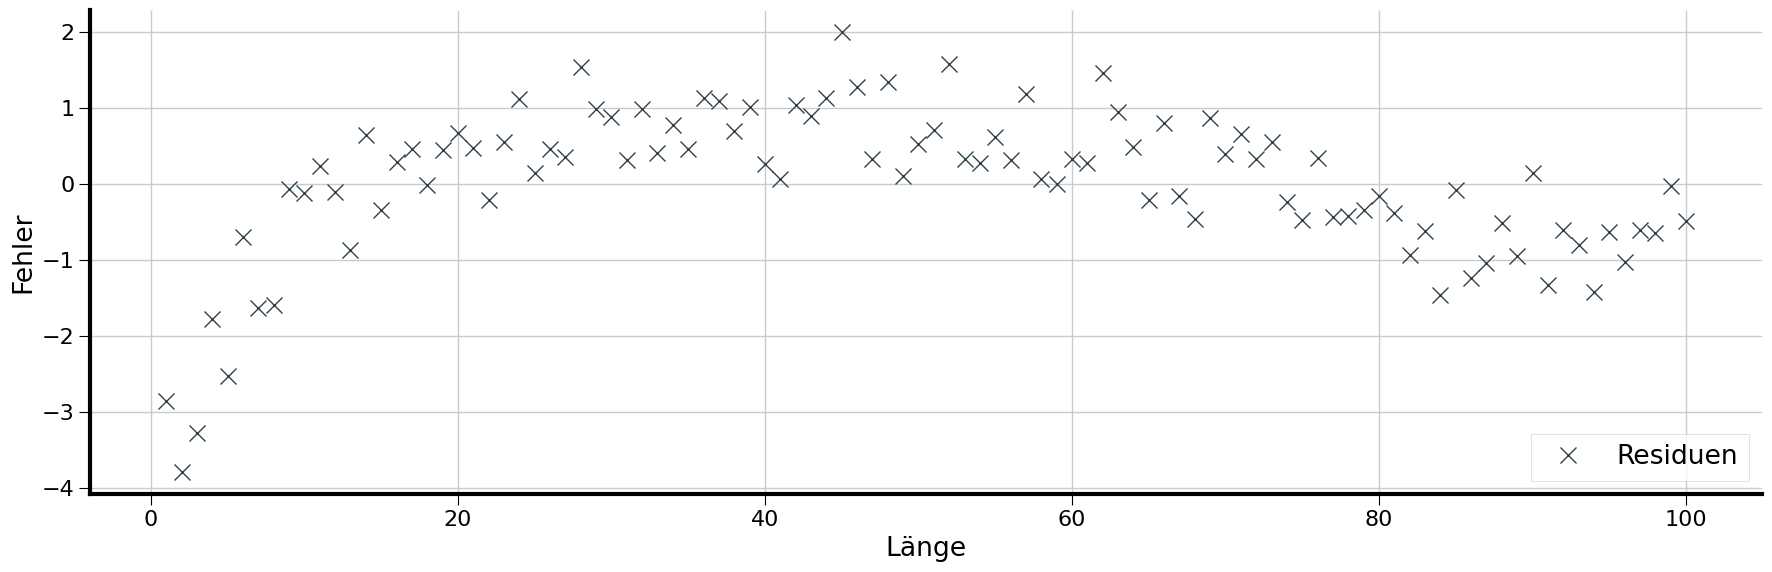

In [22]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)
df['Residuen'] = df['Periode']-df['Vorhersage_Länge']
ax.plot(df['Länge'],df['Residuen'], 'x', label='Residuen')
ax.legend(loc=4)

plt.ylabel('Fehler')
plt.xlabel('Länge')
plt.tight_layout()

# Nicht-Linearität umgehen

* Unser Modell behält die lineare Form, da alle gesuchten $\beta$ linear sind. 
* Die Daten können aber natürlich manipuliert werden, z.B. $\sqrt(x)$ anstelle von $x$.
* Es können auch gemischte Terme eingebracht werden, z.B. $x_1 \cdot x_2$.

In [23]:
# Berechne OLS für Periode über Länge
import statsmodels.api as sm
X = sm.add_constant(df['Länge'])
y = df['Periode']
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                Periode   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           1.02e-66
Time:                        12:27:42   Log-Likelihood:                -142.16
No. Observations:                 100   AIC:                             288.3
Df Residuals:                      98   BIC:                             293.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6435      0.204     32.550      0.0

In [24]:
# Berechne OLS für Periode über der Wurzel von Länge
df['Länge_2'] = np.sqrt(df['Länge'])
X = sm.add_constant(df[['Länge_2']])
y = df['Periode']
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                Periode   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     7909.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           1.61e-95
Time:                        12:27:42   Log-Likelihood:                -74.507
No. Observations:                 100   AIC:                             153.0
Df Residuals:                      98   BIC:                             158.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2960      0.157      8.241      0.0

# Angepasster Residuen-Plot für $\sqrt{x_{Länge}}$

In [25]:
# Trainiere Model für Periode über Wurzel der Länge
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression().fit(df[['Länge_2']], df['Periode'])
df['Vorhersage_Länge_2'] = model_2.predict(df[['Länge_2']])
df['Residuen_2'] = df['Periode'] - df['Vorhersage_Länge_2']

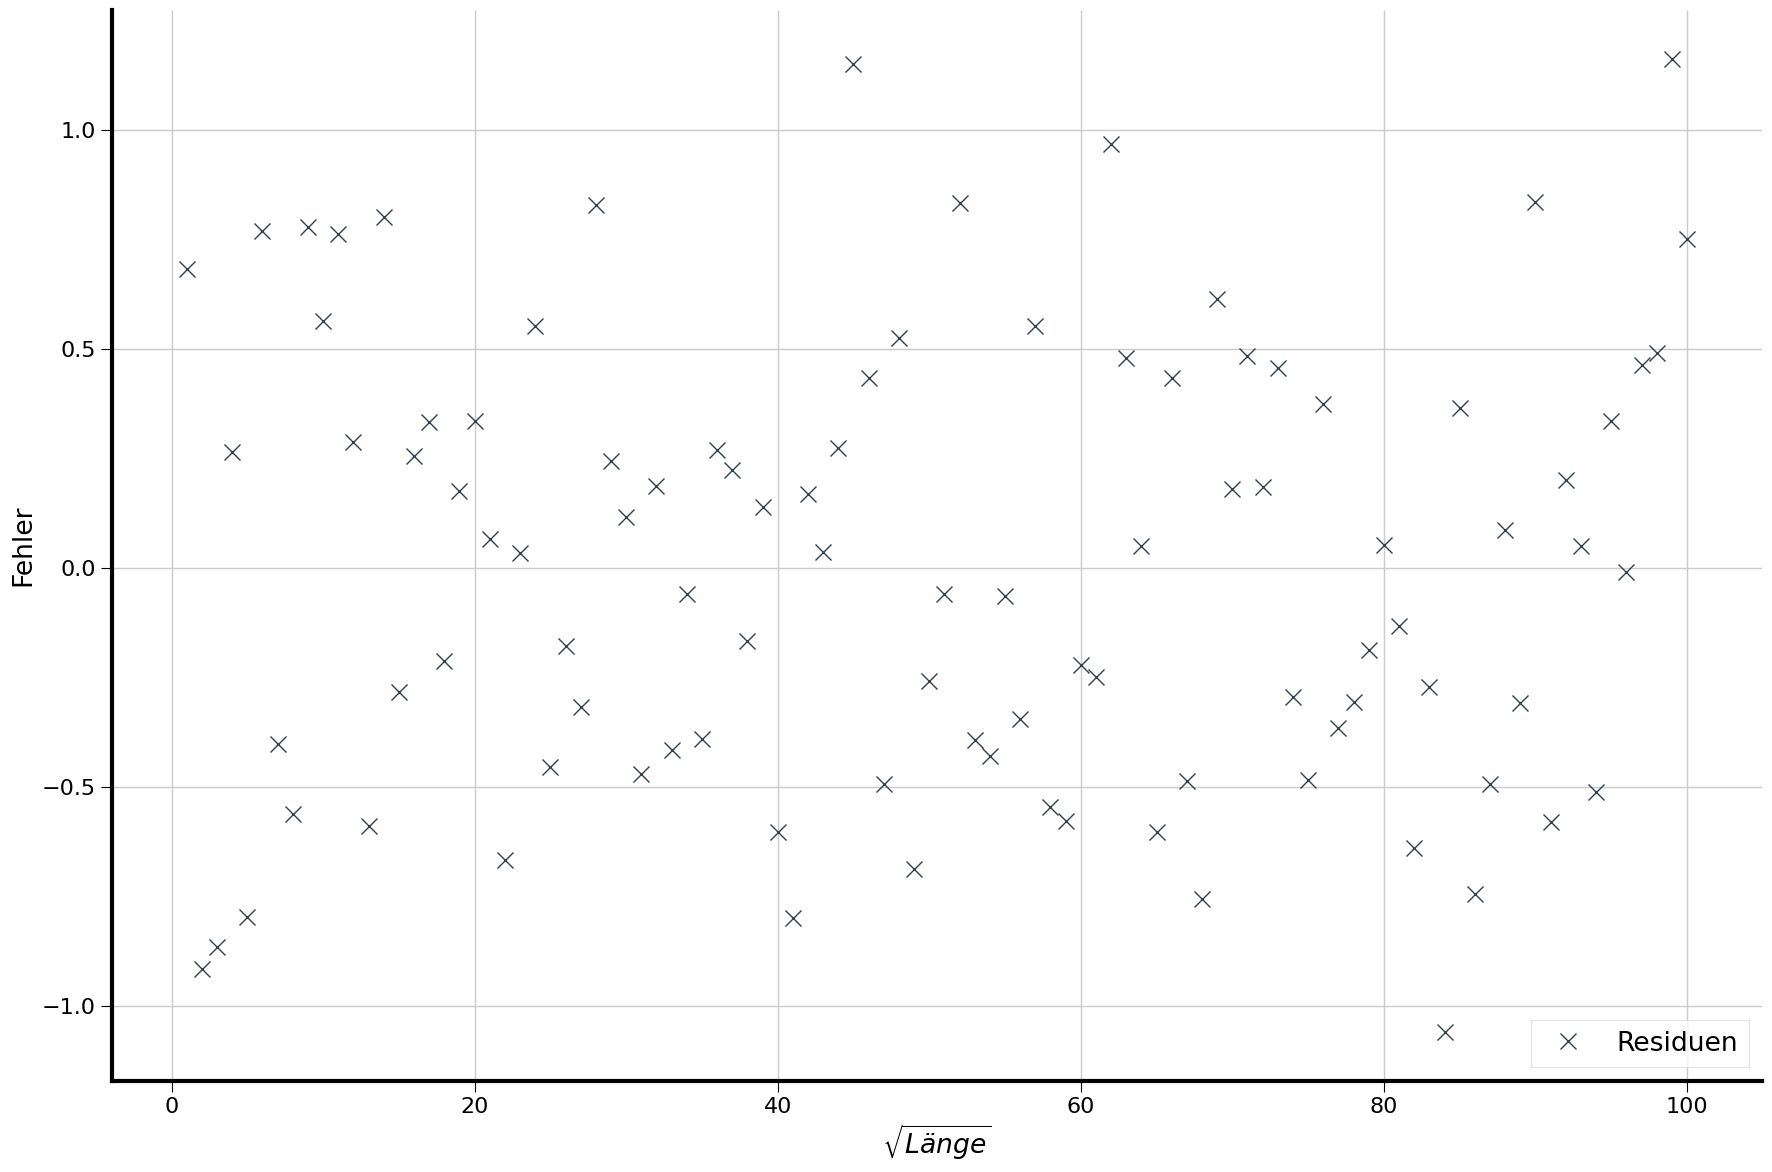

In [26]:
fig, ax = plt.subplots(1, 1, figsize=plot_size)

ax.plot(df['Länge'],df['Residuen_2'], 'x', label='Residuen')
ax.legend(loc=4)
plt.ylabel('Fehler')
plt.xlabel(r'$\sqrt{Länge}$')
plt.tight_layout()

# High Leverage Points

* Daten können "weit weg" vom "größten" Teil der Daten liegen: 
    * Ggfs. handelt es sich um `Ausreißer`. Deren Ursache könnte z.B. ein Messfehler sein.
    * Sie können auch *normaler* Bestandteil der Daten sein.
* Ob diese Punkte in der Analyse enthalten bleiben, ist von Fall zu Fall zu entscheiden.
* In jedem Fall haben Sie einen mehr oder weniger starken Einfluß auf das Modell. 
* Manche Modelle sind anfällig gegenüber Ausreißern, andere robust. 

In [27]:
# Aktueller Wert an Stelle 50   
rememberme = df.loc[50,'Periode']
df.loc[50,'Periode']

15.292060820517294

In [28]:
# Setze neuen Wert an Stelle 50
df.loc[50,'Periode'] = 8

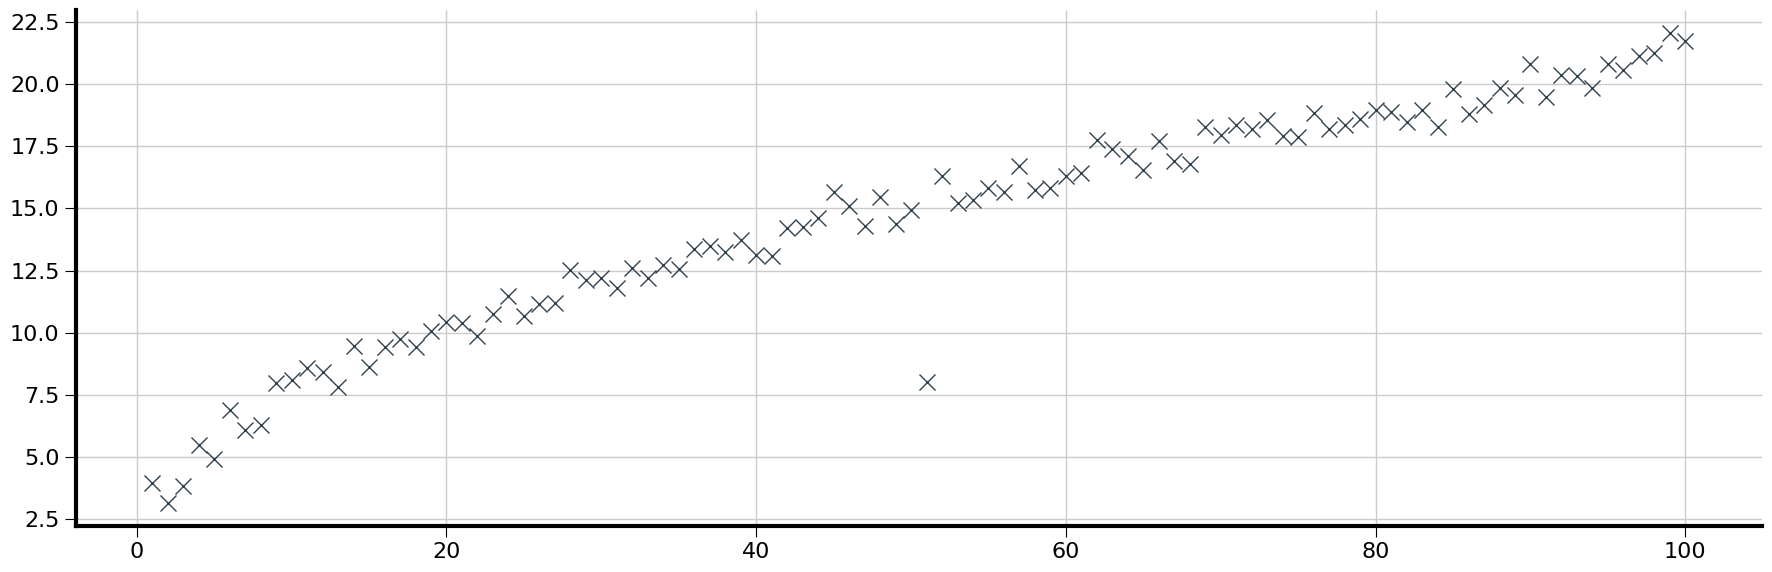

In [29]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)
ax.plot(df['Länge'],df['Periode'], 'x')
plt.tight_layout()

# Einfluß des neuen Datenpunktes auf das Modell

In [30]:
# Trainiere ein neues Modell
from sklearn.linear_model import LinearRegression
model_outlier = LinearRegression().fit(df[['Länge']], df['Periode'])
df['Vorhersage_Länge_outlier'] = model_outlier.predict(df[['Länge']])

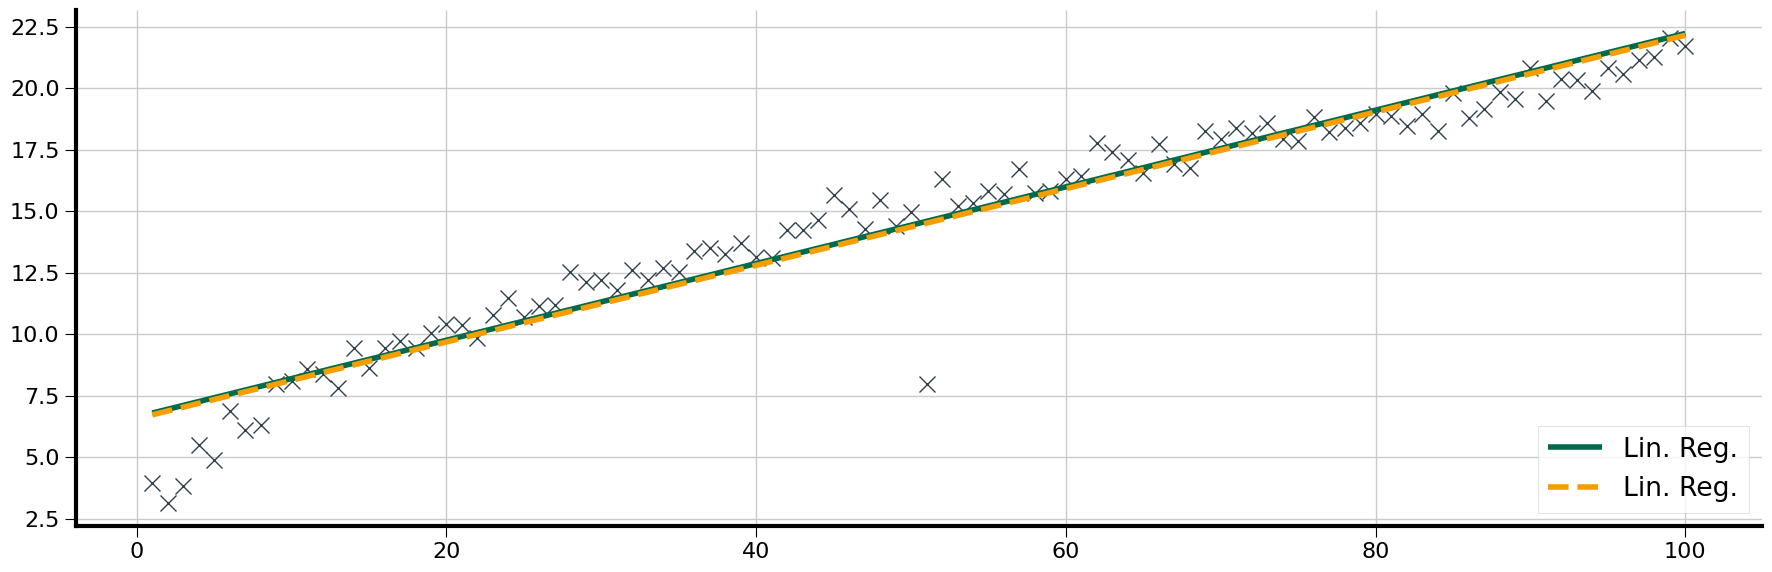

In [31]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(df['Länge'],df['Periode'], 'x')
ax.plot(df['Länge'],df['Vorhersage_Länge'], c=green, label='Lin. Reg.')
ax.plot(df['Länge'],df['Vorhersage_Länge_outlier'],'--', c=orange, label='Lin. Reg.')

ax.legend(loc=4)
plt.tight_layout()

# High Leverage Points II

In [32]:
# Zeige aktuelle Werte am Ende der Daten
df.loc[50,'Periode'] = rememberme
df.loc[99,['Periode', 'Länge']]

Periode     21.728931
Länge      100.000000
Name: 99, dtype: float64

In [33]:
# Manipuliere Werte
df.loc[99,'Periode'] = 5
df.loc[99,'Länge'] = 140

In [34]:
# Trainiere neues Modell
from sklearn.linear_model import LinearRegression
model_hlp = LinearRegression().fit(df[['Länge']], df['Periode'])
df['Vorhersage_Länge_hlp'] = model_hlp.predict(df[['Länge']])
df['Vorhersage_Länge'] = model_l.predict(df[['Länge']])

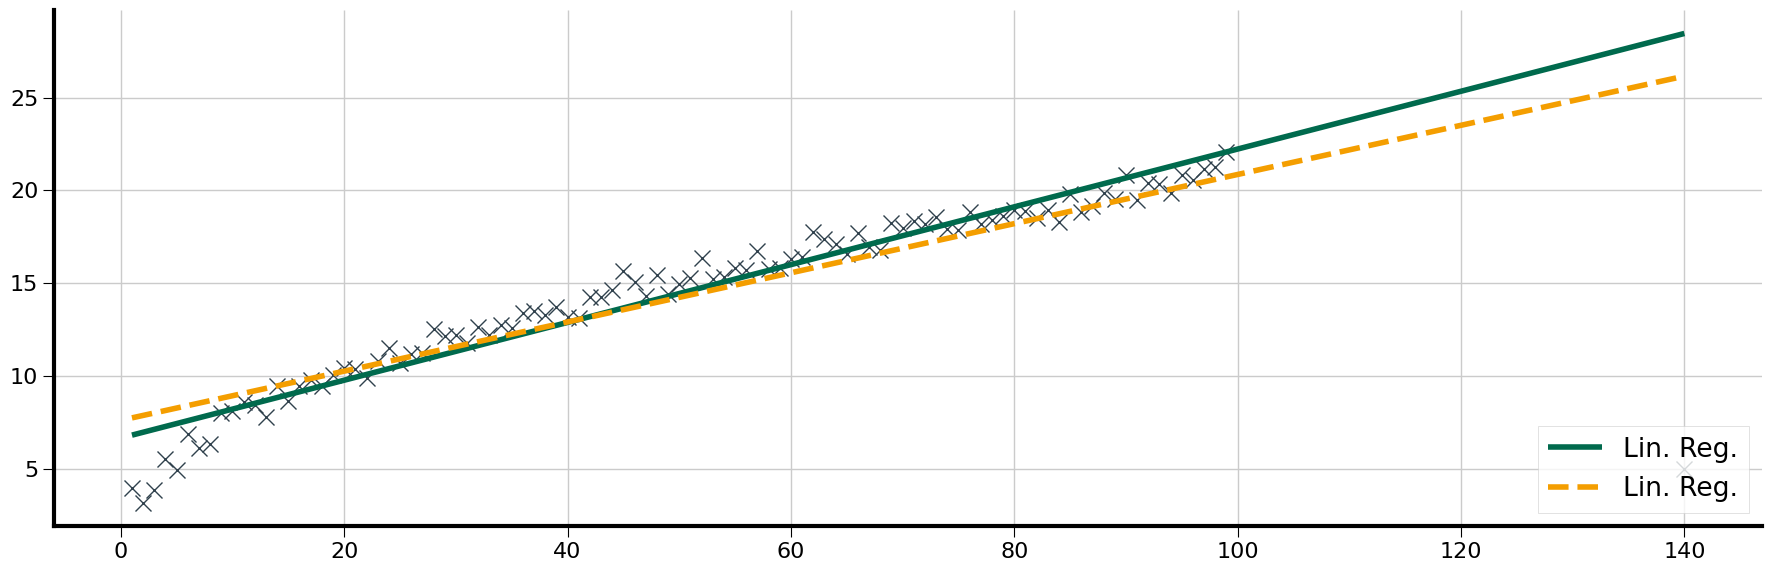

In [35]:
# Plotte Veränderung der Linearen Regression nach High Leverage Point
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)
ax.plot(df['Länge'],df['Periode'], 'x')
ax.plot(df['Länge'],df['Vorhersage_Länge'], c=green, label='Lin. Reg.')
ax.plot(df['Länge'],df['Vorhersage_Länge_hlp'],'--', c=orange, label='Lin. Reg.')
ax.legend(loc=4)
plt.tight_layout()

# Berechne OLS mit High Leverage Point


* Der zweite Punkt hat einen deutlich stärkeren Einfluß auf das Modell
* Lediglich ein Wert (d.h. 1% der Daten) wurde manipuliert. 
* $R^2$ sinkt daduch von $0.966$ auf $0.727$

In [36]:
X = sm.add_constant(df['Länge'])
y = df['Periode']
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                Periode   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     256.3
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           4.24e-29
Time:                        12:27:42   Log-Likelihood:                -231.24
No. Observations:                 100   AIC:                             466.5
Df Residuals:                      98   BIC:                             471.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5969      0.488     15.554      0.0

# Überflüssige (Parameter)

* Wir generieren einen neuen Datensatz. Dieses Mal beinhaltet dieser auch Daten zur Masse. 
* Offensichtlich gibt es keinen physisch begründeten Zusammenhang. 
* Aber wie können Sie das an dieser Stelle feststellen?

In [37]:
g = 9.81
# Initialisiere Zufallswerte / Linspaces
df = pd.DataFrame({'Periode': np.random.normal(1,.5, size=100), 
                   'Länge': np.linspace(0.5,3.,num=100),
                   'Masse':np.linspace(5.,15.,num=100)})
# Shuffle Masse, um Zusammenhänge zu eliminieren
df['Masse'] = np.random.permutation(df['Masse'].values)
# Berechne verrauschte Periode
df['Periode'] = 2*math.pi*np.sqrt(df['Länge']/g)+df['Periode']
df.head()

,Periode,Länge,Masse
0,2.233912,0.500000,9.444444
1,2.334193,0.525253,7.929293
2,3.038252,0.550505,5.909091
3,2.849809,0.575758,11.161616
4,2.875266,0.601010,12.474747


# Versuchsdaten Mathematisches Pendel

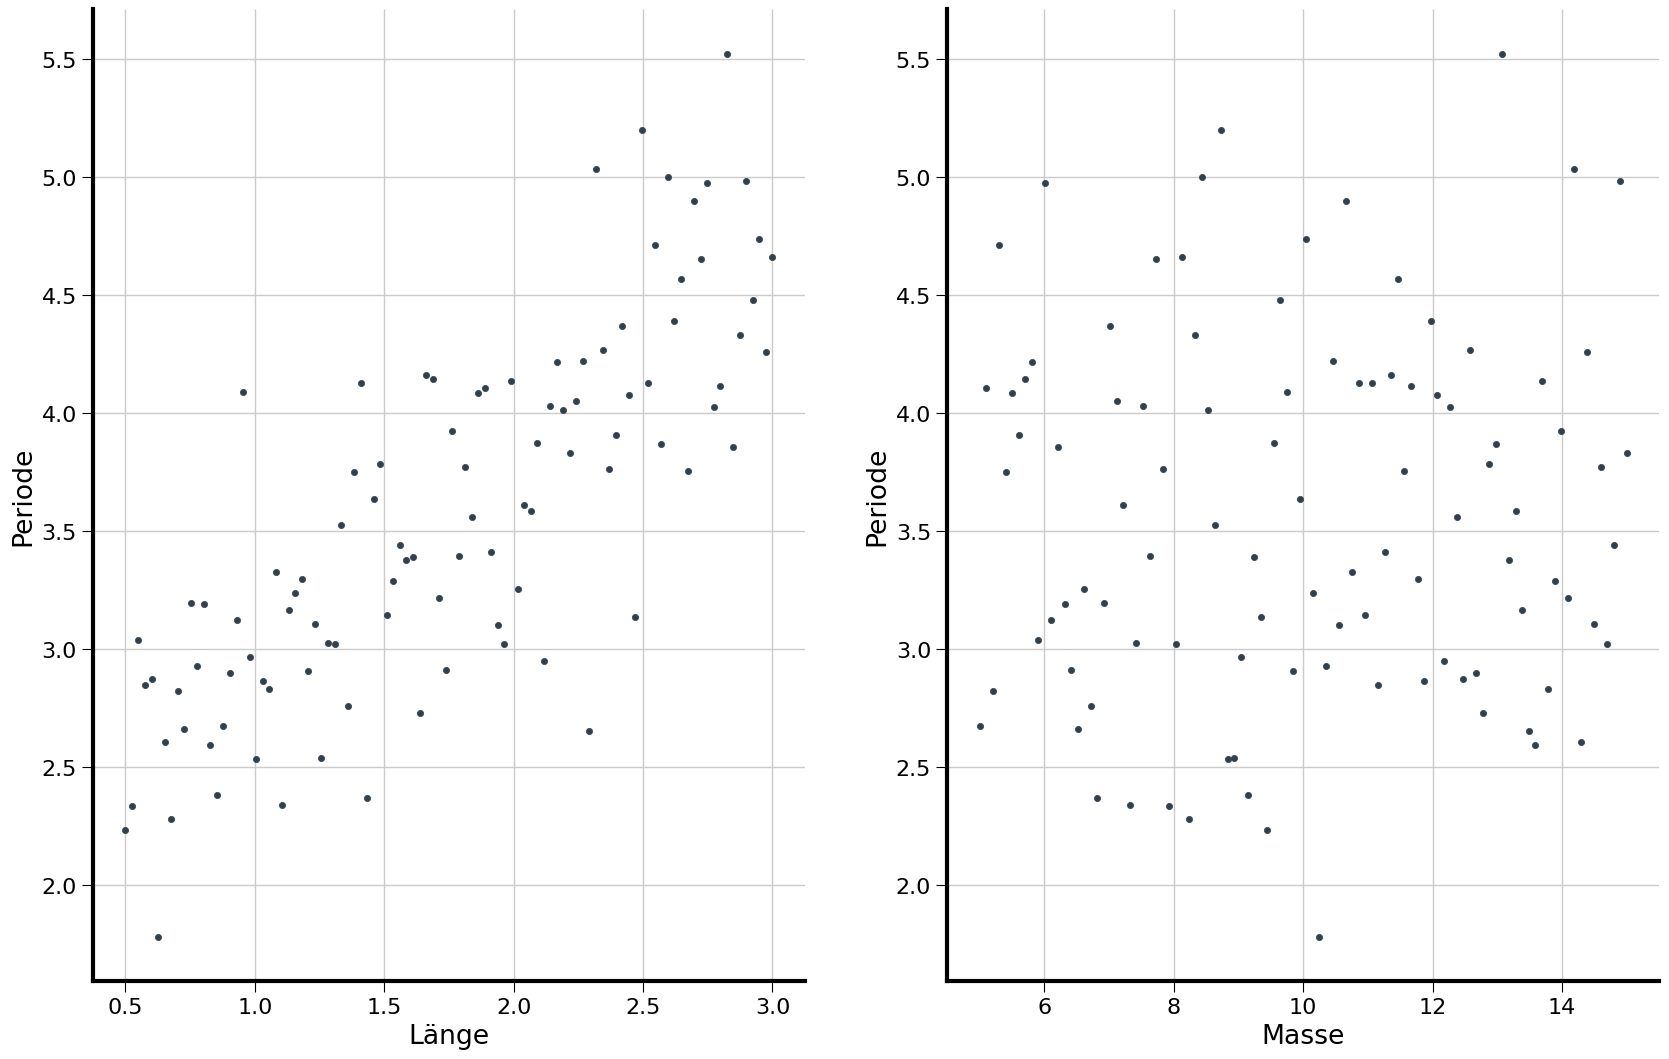

In [38]:
predictors = [ 'Länge', 'Masse']
fig, ax = plt.subplots(1, len(predictors), figsize=plot_size)
for i, predictor in enumerate(predictors):
    df.plot(y = 'Periode', x = predictor, kind="scatter", ax=ax[i])

# Lineare Regression Masse

$$\hat{T_0} = \beta_0+\beta_1 m$$ 

* Ein Zusammenhang zwischen $m$ und $T_0$ besteht wenn $\beta_1\ne0$  
* Wenn wir nachweisen können, dass $\beta_1$ nicht von Null unterscheidbar ist, ist der Zusammenhang widerlegt

In [76]:
# OLS für Periode über Mass
import statsmodels.api as sm
X = sm.add_constant(df[['Masse', 'Länge']])
y = df['Periode'] 
est = sm.OLS(y, X).fit()
print(est.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Periode   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     131.4
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           2.45e-28
Time:                        12:29:03   Log-Likelihood:                -232.90
No. Observations:                 100   AIC:                             471.8
Df Residuals:                      97   BIC:                             479.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7451      0.974      7.954      0.0

# Anwendungsbeispiel

<img style="float: right;" src="img/drugila.png" width=15% class="stretch">

$$-0.05-0.18 \sin{\phi}+ 1.54 \frac{t}{c} + 0.11 \sin{\phi}^2+ 27.46\frac{t}{c}^2-0.42 \frac{t}{c}\sin{\phi}$$

* Angenommen Sie verfügen über eine beliebige Menge an Daten aus der CFD Simulation:
* Wie bauen Sie das oben genannte Modell?

*Drugila et al., Analysis of Interference Drag for Strut-Strut Interaction in
Transonic Flow, 2011*

# Zusammenfassung

* Lineare Regression
* Parameter ignorieren bei der Linearen Regression
* Schwächen der Linearen Regression